## Importing all necessary libraries

In [ ]:
import os
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import scipy.stats as stats
import matplotlib.pyplot as plt




import warnings

warnings.filterwarnings('ignore')

## Downloading Datasets

In [ ]:
!gdown https://drive.google.com/uc?id=1jetioaunmQUhEBTKTy-vZ3IGaetJjbT7

Downloading...
From: https://drive.google.com/uc?id=1jetioaunmQUhEBTKTy-vZ3IGaetJjbT7
To: /content/Clean_Dataset.csv
100% 24.7M/24.7M [00:00<00:00, 40.6MB/s]


## Loading Data Into Pandas DataFrame

In [ ]:
df = pd.read_csv("Clean_Dataset.csv")
print(df.shape)
df.head()

(300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)
print(df.shape)

(300153, 11)


## Checking the datatypes of every features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


## Descriptive Statistics

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.describe(include="O")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


## Exploratory Data Analysis

## Data Cleaning

- Checking duplicates
- Checking missing values

In [ ]:
df[df.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


## There are ... duplicate items in the data.

In [ ]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## There are ... missing values in the data

## Univariate Analysis

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

## Function To Create A BarGraph

In [ ]:
def create_piechart(df, cat_col, title= "",
                    explode_value=None, colors=None):

  plt.figure(figsize=(8, 6))
  plt.pie(x=df["frequency"], labels = df[cat_col],
          autopct = "%.1f%%", colors = colors,
          explode = explode_value)
  plt.title(title)
  plt.legend()
  plt.show()

In [ ]:
def create_univariate_bargraph(df, xaxis_col, yaxis_col,
                               title = "", color=None):
  plt.figure(figsize=(8, 6))
  sns.barplot(data=df, x = xaxis_col, y=yaxis_col, palette=color)
  plt.title(title)
  plt.show()

In [ ]:
def univariate_freq_count(df, cat_col):
  frequency_df = df[cat_col].value_counts().to_frame().reset_index()
  frequency_df.columns = [cat_col, 'frequency']
  return frequency_df

## airline column

In [ ]:
airline_df = univariate_freq_count(df = df, cat_col="airline")
airline_df

,airline,frequency
0,Vistara,127859
1,Air_India,80892
2,Indigo,43120
3,GO_FIRST,23173
4,AirAsia,16098
5,SpiceJet,9011


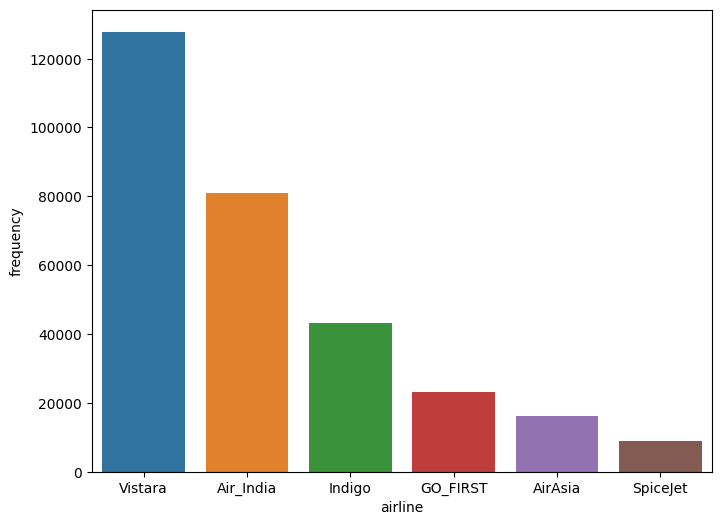

In [ ]:
create_univariate_bargraph(df = airline_df, xaxis_col = "airline",
                           yaxis_col = "frequency")

## flight column

In [ ]:
flight_df = univariate_freq_count(df = df, cat_col="flight")
flight_df

,flight,frequency
0,UK-706,3235
1,UK-772,2741
2,UK-720,2650
3,UK-836,2542
4,UK-822,2468
...,...,...
1556,SG-9923,1
1557,6E-6474,1
1558,6E-865,1
1559,G8-705,1


In [ ]:
flight_df["flight_type"] = flight_df['flight'].str.split("-").str[0]
flight_df["flight_type"].value_counts()

6E    704
AI    218
G8    205
SG    186
UK    133
I5    115
Name: flight_type, dtype: int64

In [ ]:
df["flight_type"] = df['flight'].str.split("-").str[0]
df["flight_type"].value_counts()

UK    127859
AI     80892
6E     43120
G8     23173
I5     16098
SG      9011
Name: flight_type, dtype: int64

## Source City

In [ ]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [ ]:
source_city_df = univariate_freq_count(df = df, cat_col="source_city")
source_city_df

,source_city,frequency
0,Delhi,61343
1,Mumbai,60896
2,Bangalore,52061
3,Kolkata,46347
4,Hyderabad,40806
5,Chennai,38700


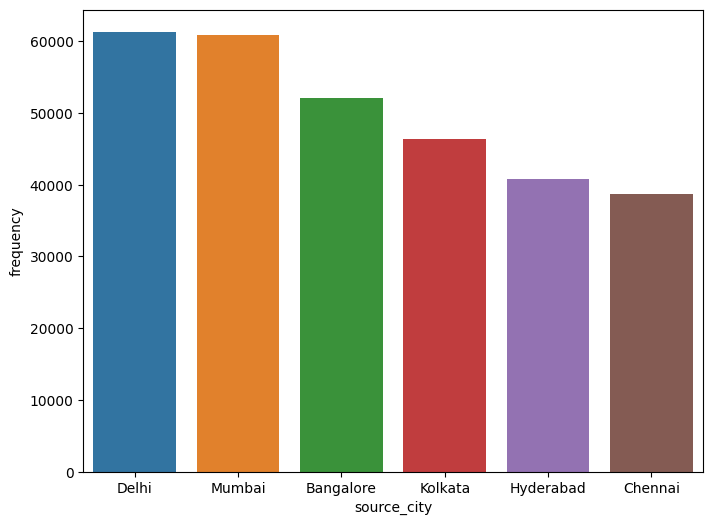

In [ ]:
create_univariate_bargraph(df = source_city_df, xaxis_col = "source_city",
                           yaxis_col = "frequency")

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'flight_type'],
      dtype='object')

In [ ]:
df[['source_city', 'destination_city']].value_counts()

source_city  destination_city
Delhi        Mumbai              15289
Mumbai       Delhi               14809
Delhi        Bangalore           14012
Bangalore    Delhi               13756
             Mumbai              12939
Mumbai       Bangalore           12885
             Kolkata             12602
Delhi        Kolkata             11934
Kolkata      Mumbai              11467
Delhi        Chennai             10780
Kolkata      Delhi               10506
Mumbai       Hyderabad           10470
             Chennai             10130
Hyderabad    Mumbai              10064
Bangalore    Kolkata             10028
Kolkata      Bangalore            9824
Chennai      Delhi                9783
             Mumbai               9338
Delhi        Hyderabad            9328
Bangalore    Hyderabad            8928
Hyderabad    Delhi                8506
             Kolkata              7987
Kolkata      Hyderabad            7897
Hyderabad    Bangalore            7854
Chennai      Kolkata              

## Destination City

In [ ]:
destination_city_df = univariate_freq_count(df = df, cat_col="destination_city")
destination_city_df

,destination_city,frequency
0,Mumbai,59097
1,Delhi,57360
2,Bangalore,51068
3,Kolkata,49534
4,Hyderabad,42726
5,Chennai,40368


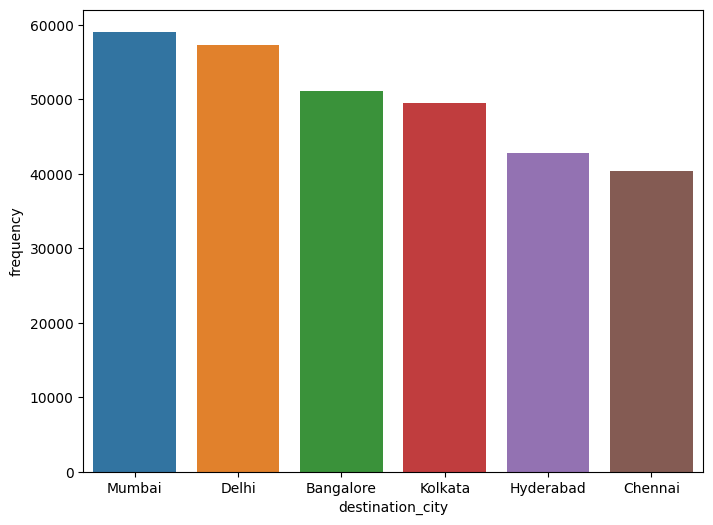

In [ ]:
create_univariate_bargraph(df = destination_city_df, xaxis_col = "destination_city",
                           yaxis_col = "frequency")

In [ ]:
df.drop('flight_type', axis=1, inplace=True)

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## Class columns

In [ ]:
class_df = univariate_freq_count(df = df, cat_col="class")
class_df

,class,frequency
0,Economy,206666
1,Business,93487


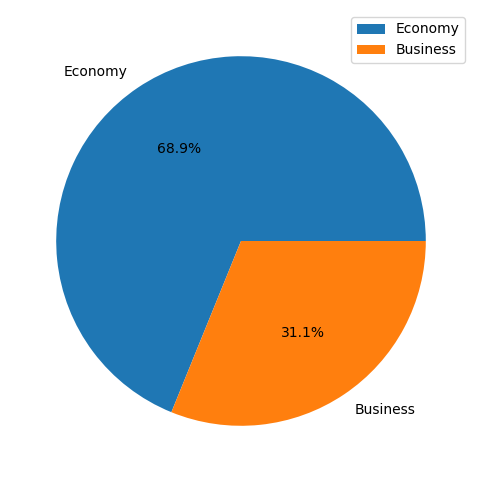

In [ ]:
create_piechart(class_df, "class")

## Stops columns

In [ ]:
stops_df = univariate_freq_count(df = df, cat_col="stops")
stops_df

,stops,frequency
0,one,250863
1,zero,36004
2,two_or_more,13286


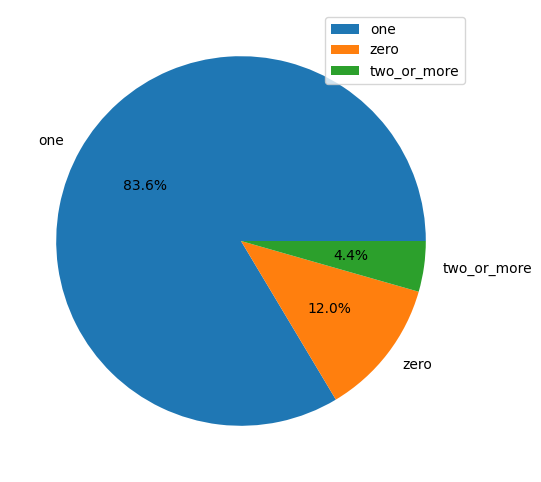

In [ ]:
create_piechart(stops_df, "stops")

## Arrival Time

In [ ]:
arrival_time_df = univariate_freq_count(df = df, cat_col="arrival_time")
arrival_time_df

,arrival_time,frequency
0,Night,91538
1,Evening,78323
2,Morning,62735
3,Afternoon,38139
4,Early_Morning,15417
5,Late_Night,14001


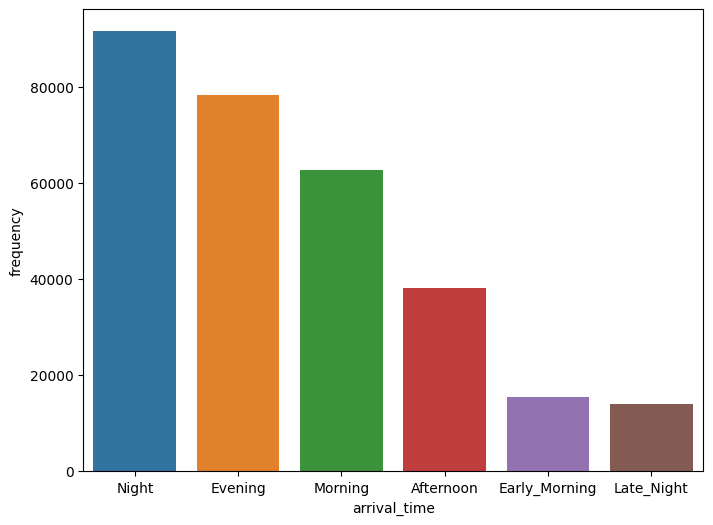

In [ ]:
create_univariate_bargraph(df = arrival_time_df, xaxis_col = "arrival_time",
                           yaxis_col = "frequency")

## Departure Time

In [ ]:
departure_time_df = univariate_freq_count(df = df, cat_col="departure_time")
departure_time_df

,departure_time,frequency
0,Morning,71146
1,Early_Morning,66790
2,Evening,65102
3,Night,48015
4,Afternoon,47794
5,Late_Night,1306


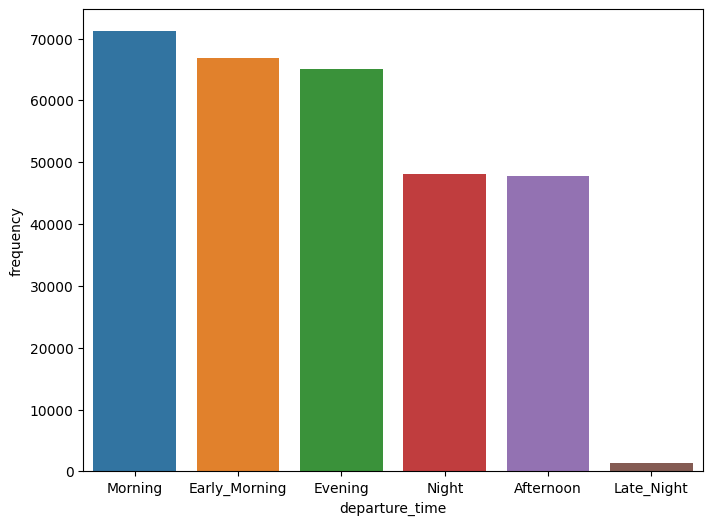

In [ ]:
create_univariate_bargraph(df = departure_time_df, xaxis_col = "departure_time",
                           yaxis_col = "frequency")

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## Duration Column

<Axes: xlabel='duration', ylabel='Density'>

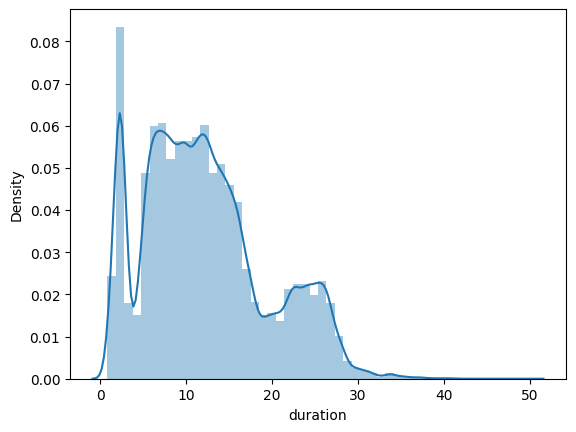

In [ ]:
sns.distplot(df['duration'], kde=True)

## Days Left Column

<Axes: xlabel='days_left', ylabel='Density'>

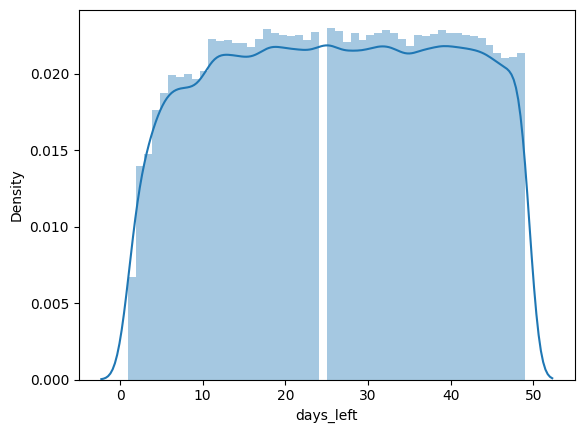

In [ ]:
sns.distplot(df['days_left'], kde=True)

## Target Column

<Axes: xlabel='price', ylabel='Density'>

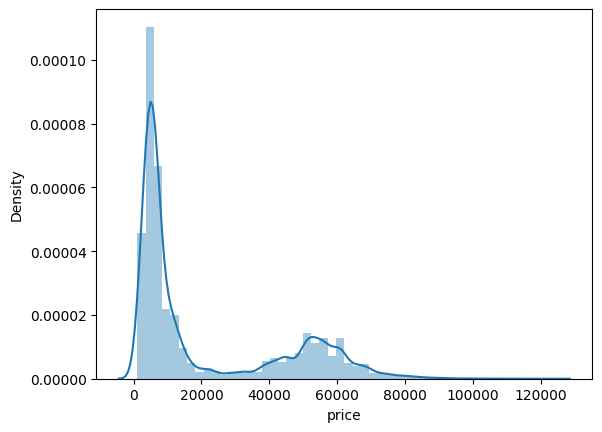

In [ ]:
sns.distplot(df['price'], kde=True)

## Bivariate Analysis

## How days_left affect the ticket_price?

In [ ]:
df['ticket_purchase_type'] = "within_2_days"
df.loc[df['days_left'] > 2, "ticket_purchase_type"] = "before_2_days"

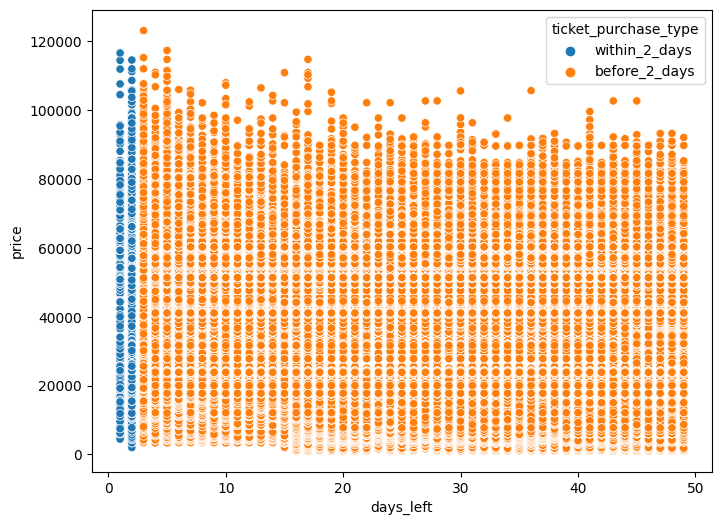

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="days_left", y="price", hue="ticket_purchase_type")
plt.show()

## Is there a relation between flight_duration & flight price?

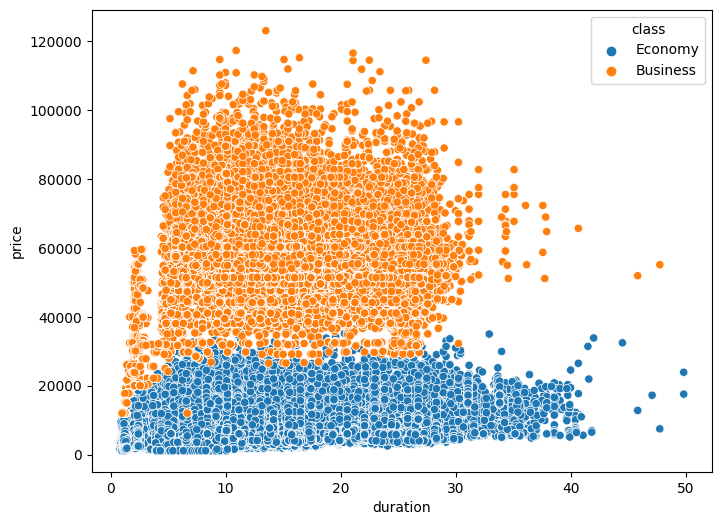

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="duration", y="price", hue="class")
plt.show()

## Multivariate Analysis

In [ ]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [ ]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [ ]:
df['stops_numerical'] = 2
df.loc[df['stops']== "one", "stops_numerical"] = 1
df.loc[df['stops'] == "zero", "stops_numerical"] = 0

<Axes: >

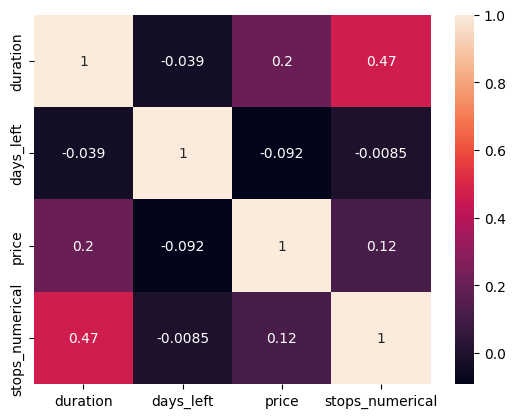

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# df.groupby("arrival_time")["price"].mean().sort_values(ascending=True)

In [ ]:
df.groupby("arrival_time")["price"].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

## Hypothesis Testing Approaches

### For Numerical & Categorical Features

## Hypothesis Testing Approach

### Step 1: Check Data Distribution

Before performing hypothesis testing, it's essential to understand the distribution of the data. If the data follows a normal distribution, you can use parametric tests. If not, you should opt for non-parametric tests.

### Step 2: Parametric Test (Normal Distribution)

If the data follows a normal distribution, you can use parametric tests. Common parametric tests include the t-test and analysis of variance (ANOVA).

**T-Test**: Use the t-test when comparing means of two groups.

**ANOVA (Analysis of Variance)**: Use ANOVA when comparing means of more than two groups.

### Step 3: Non-Parametric Test (Non-Normal Distribution)

If the data does not follow a normal distribution, non-parametric tests are appropriate. The choice between Mann-Whitney U Test and Kruskal-Wallis Test depends on the number of unique values in each category.

**Mann-Whitney U Test**: Use the Mann-Whitney U Test when comparing two independent groups.

**Kruskal-Wallis Test**: Use the Kruskal-Wallis Test when comparing means of more than two independent groups.

### Summary

- **Normal Distribution**: Use parametric tests (t-test, ANOVA).
- **Non-Normal Distribution with 2 Unique Values**: Use Mann-Whitney U Test.
- **Non-Normal Distribution with >2 Unique Values**: Use Kruskal-Wallis Test.

This approach helps you choose the appropriate hypothesis testing method based on the distribution of your data and the number of unique values in each category.


In [ ]:
def check_distribution_and_homogeneity(df, category_column, value_column):
    """
    Check the distribution and homogeneity of variances for a specified value column across categories.

    Parameters:
    - df: pandas DataFrame containing the data.
    - category_column: Name of the column containing the categories.
    - value_column: Name of the column containing the values to be tested.
    """

    # List of unique categories
    categories = df[category_column].unique()

    for category in categories:
        # Subset the data for the current category
        subset = df[df[category_column] == category][value_column]

        # Check Normality:
        # Plot a histogram and Q-Q plot
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(subset, kde=True)
        plt.title(f'Histogram for {category}')

        plt.subplot(1, 2, 2)
        stats.probplot(subset, plot=plt)
        plt.title(f'Q-Q Plot for {category}')

        plt.tight_layout()
        plt.show()

        # Perform a normality test (Shapiro-Wilk)
        _, p_value_normal = stats.shapiro(subset)

        if p_value_normal < 0.05:
            print(f"The data for {category} does not follow a normal distribution (p-value = {p_value_normal}).")
        else:
            print(f"The data for {category} follows a normal distribution (p-value = {p_value_normal}).")

        # Check Homogeneity of Variances:
        # Plot boxplots for each category
        sns.boxplot(x=category_column, y=value_column, data=df)
        plt.title(f'Boxplot of {value_column} for {category}')
        plt.xticks(rotation=45)
        plt.show()

        # Perform Levene's Test for equality of variances
        _, p_value_homogeneity = stats.levene(*[df[df[category_column] == cat][value_column] for cat in categories])

        if p_value_homogeneity < 0.05:
            print(f"The variances for {category} are not homogeneous (p-value = {p_value_homogeneity}).")
        else:
            print(f"The variances for {category} are homogeneous (p-value = {p_value_homogeneity}).")

        print("\n")



## Kruskal wallis hypothesis testing

In [ ]:
def kruskal_wallis_test_and_interpret(dataframe, group_column, value_column, alpha=0.05):
    """
    Perform the Kruskal-Wallis test on a DataFrame and interpret the results.

    Parameters:
    - dataframe: pandas DataFrame containing the data.
    - group_column: Name of the column containing the group or category labels.
    - value_column: Name of the column containing the numerical values to be tested.
    - alpha: Significance level (default is 0.05).

    Returns:
    - result_dict: A dictionary containing the test results and interpretation.
    """

    groups = dataframe[group_column].unique()
    data = [dataframe[value_column][dataframe[group_column] == group] for group in groups]

    statistic, p_value = stats.kruskal(*data)

    # Null Hypothesis
    null_hypothesis = f"There is no significant difference in {value_column} among the groups."

    # Alternative Hypothesis
    alternative_hypothesis = f"There is a significant difference in {value_column} among the groups."

    # Interpretation
    if p_value < alpha:
        interpretation = f"Reject the null hypothesis. {alternative_hypothesis}"
    else:
        interpretation = f"Fail to reject the null hypothesis. {null_hypothesis}"

    result_dict = {
        "Null Hypothesis": null_hypothesis,
        "Alternative Hypothesis": alternative_hypothesis,
        "Kruskal-Wallis H-statistic": statistic,
        "p-value": p_value,
        "Interpretation": interpretation
    }

    return result_dict



## Mann Whitney Hypothesis Testing

In [ ]:
def mann_whitney_u_test(group_col, value_col, df, alpha=0.05):
    """
    Perform the Mann-Whitney U test on a DataFrame and return the test results.

    Parameters:
    - group_col: Name of the column containing the group or category labels.
    - value_col: Name of the column containing the numerical values to be tested.
    - df: pandas DataFrame containing the data.
    - alpha: Significance level (default is 0.05).

    Returns:
    - result_dict: A dictionary containing the test results.
    """

    groups = df[group_col].unique()
    result_dict = {}

    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]

            group1_data = df[df[group_col] == group1][value_col]
            group2_data = df[df[group_col] == group2][value_col]

            statistic, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')

            # Null Hypothesis
            null_hypothesis = f"There is no significant difference in {value_col} between {group1} and {group2}."

            # Alternative Hypothesis
            alternative_hypothesis = f"There is a significant difference in {value_col} between {group1} and {group2}."

            # Interpretation
            if p_value < alpha:
                interpretation = f"Reject the null hypothesis. {alternative_hypothesis}"
            else:
                interpretation = f"Fail to reject the null hypothesis. {null_hypothesis}"

            result_key = f"{group1} vs {group2}"
            result_dict[result_key] = {
                "Null Hypothesis": null_hypothesis,
                "Alternative Hypothesis": alternative_hypothesis,
                "Mann-Whitney U Statistic": statistic,
                "p-value": p_value,
                "Interpretation": interpretation
            }

    return result_dict




## Research Questions
## a) How does the ticket price vary between Economy and Business class?
## b) Does price vary with Airlines?
## c) How is the price affected when tickets are bought in just 1 or 2 days before departure?
## d) Does ticket price change based on the departure time and arrival time?
## e) How the price changes with change in Source and Destination?



## a) How does the ticket price vary between Economy and Business class?


## Distribution Of Ticket Price & Passenger Class

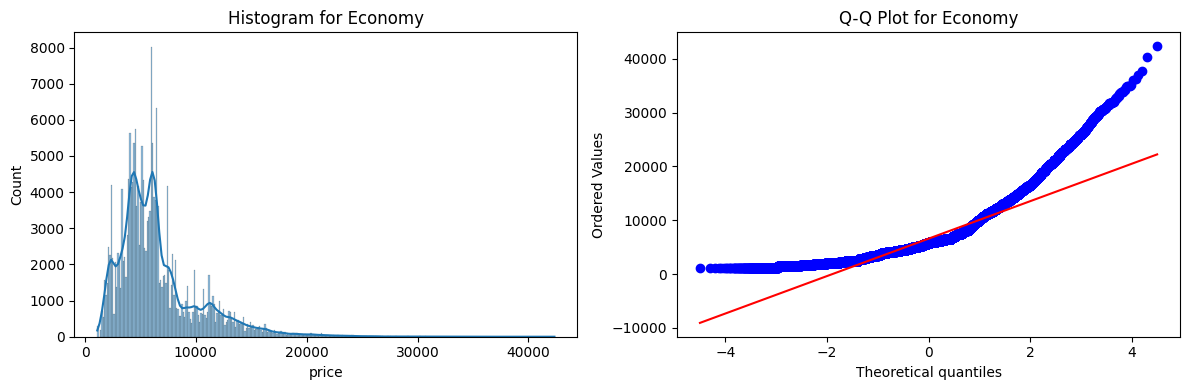

The data for Economy does not follow a normal distribution (p-value = 0.0).


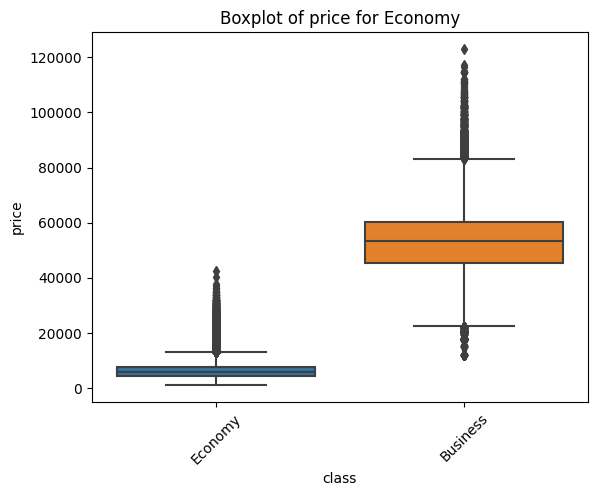

The variances for Economy are not homogeneous (p-value = 0.0).




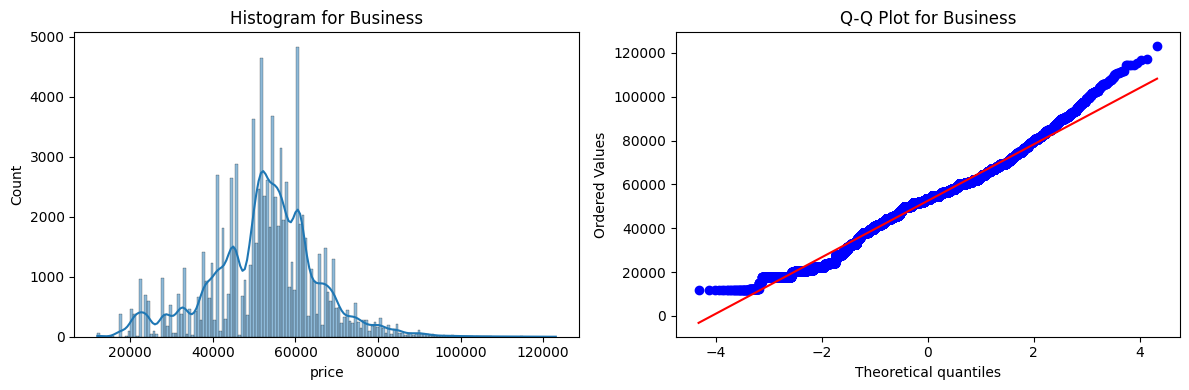

The data for Business does not follow a normal distribution (p-value = 0.0).


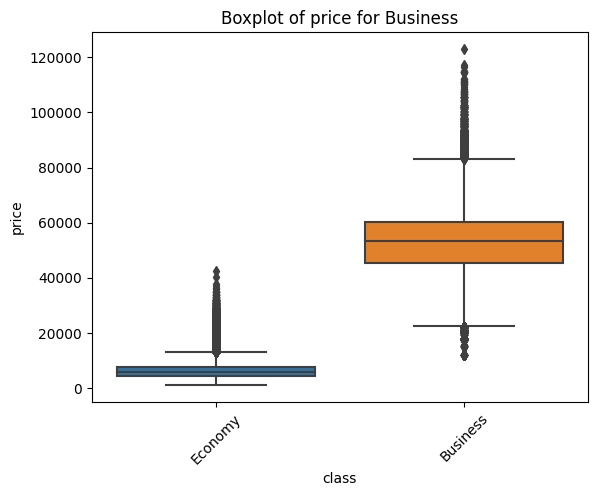

The variances for Business are not homogeneous (p-value = 0.0).




In [ ]:
check_distribution_and_homogeneity(df, 'class', 'price')

In [ ]:
result = mann_whitney_u_test('class', 'price', df)
for key, value in result.items():
    print(key)
    for subkey, subvalue in value.items():
        print(f"{subkey}: {subvalue}")

Economy vs Business
Null Hypothesis: There is no significant difference in price between Economy and Business.
Alternative Hypothesis: There is a significant difference in price between Economy and Business.
Mann-Whitney U Statistic: 6234631.5
p-value: 0.0
Interpretation: Reject the null hypothesis. There is a significant difference in price between Economy and Business.


In [ ]:
df.groupby("class")["price"].mean()

class
0     6572.342383
1    52540.081124
Name: price, dtype: float64

## b) Does price vary with Airlines?


## Check the distribution of airline & price

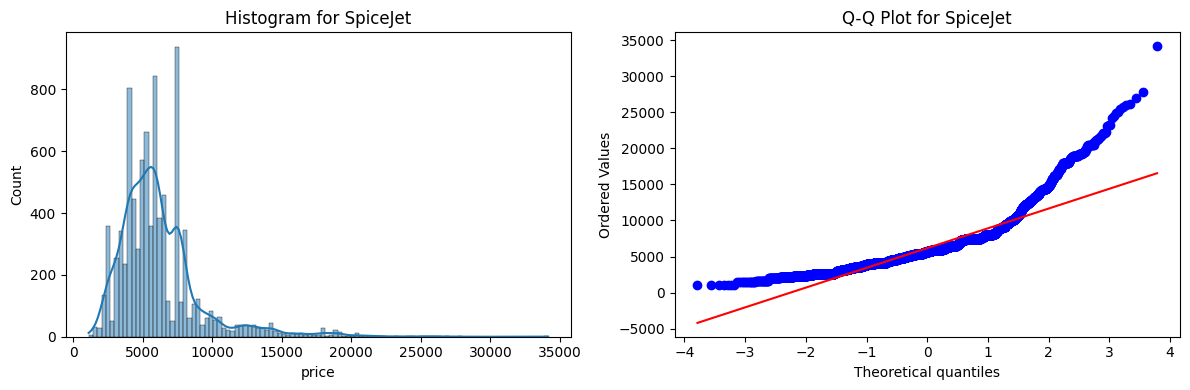

The data for SpiceJet does not follow a normal distribution (p-value = 0.0).


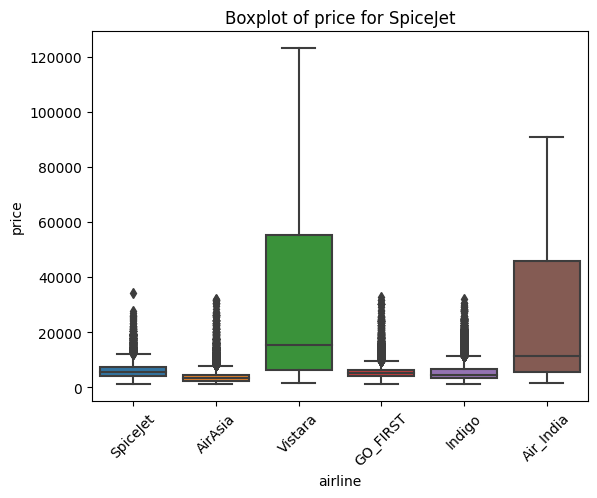

The variances for SpiceJet are not homogeneous (p-value = 0.0).




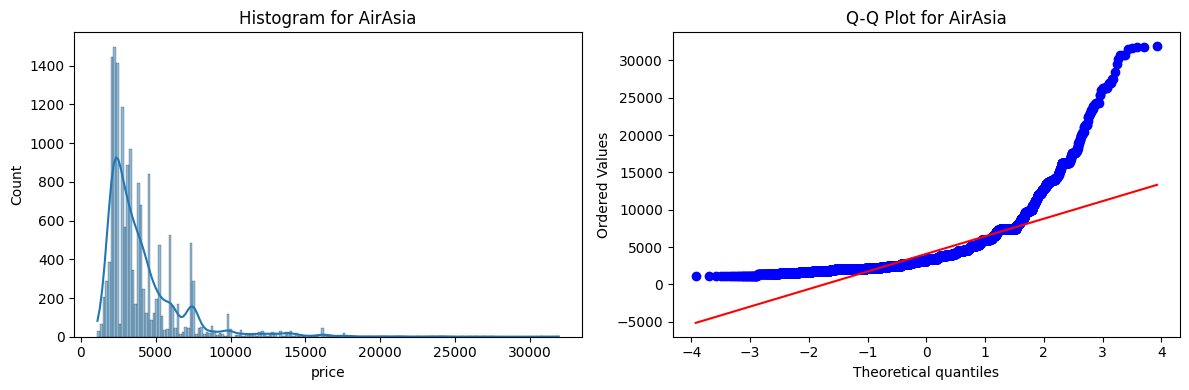

The data for AirAsia does not follow a normal distribution (p-value = 0.0).


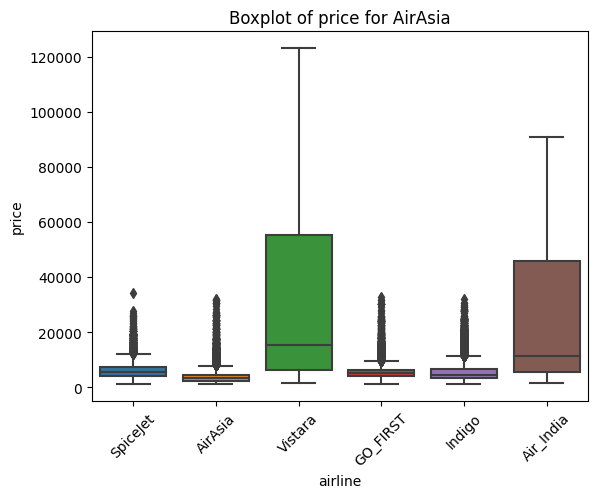

The variances for AirAsia are not homogeneous (p-value = 0.0).




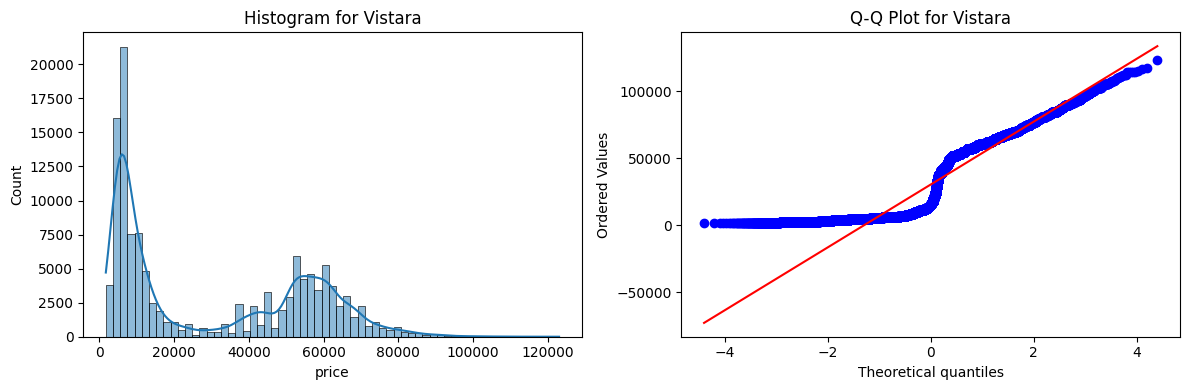

The data for Vistara does not follow a normal distribution (p-value = 0.0).


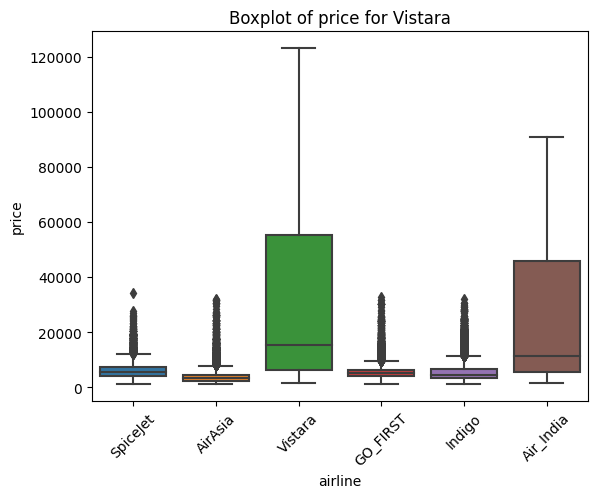

The variances for Vistara are not homogeneous (p-value = 0.0).




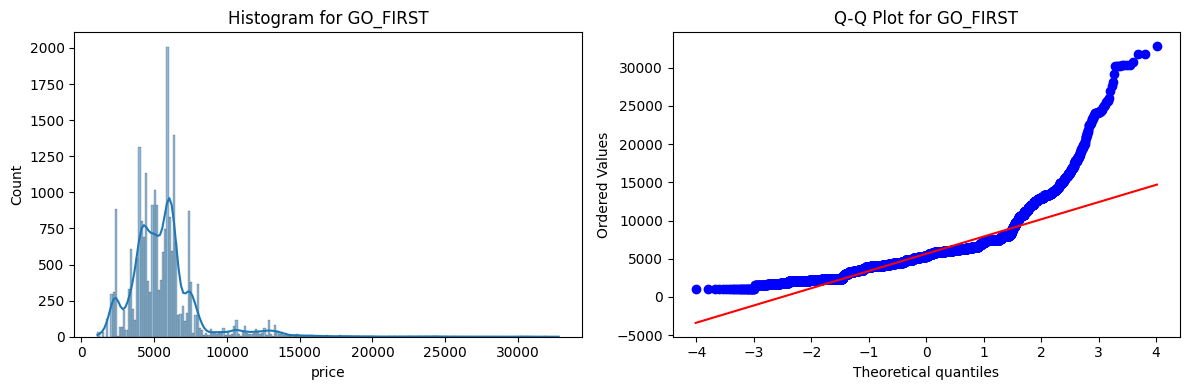

The data for GO_FIRST does not follow a normal distribution (p-value = 0.0).


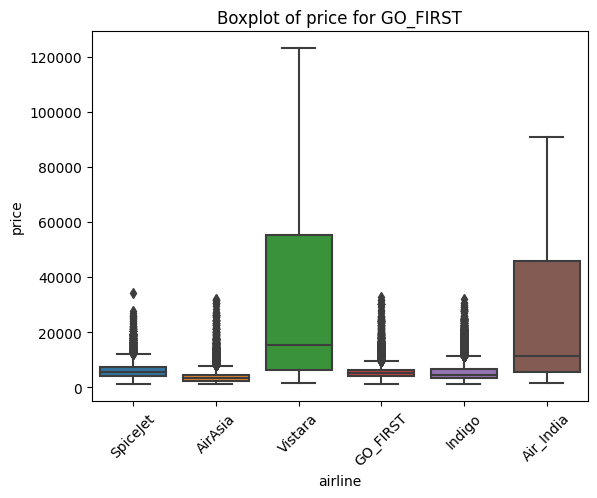

The variances for GO_FIRST are not homogeneous (p-value = 0.0).




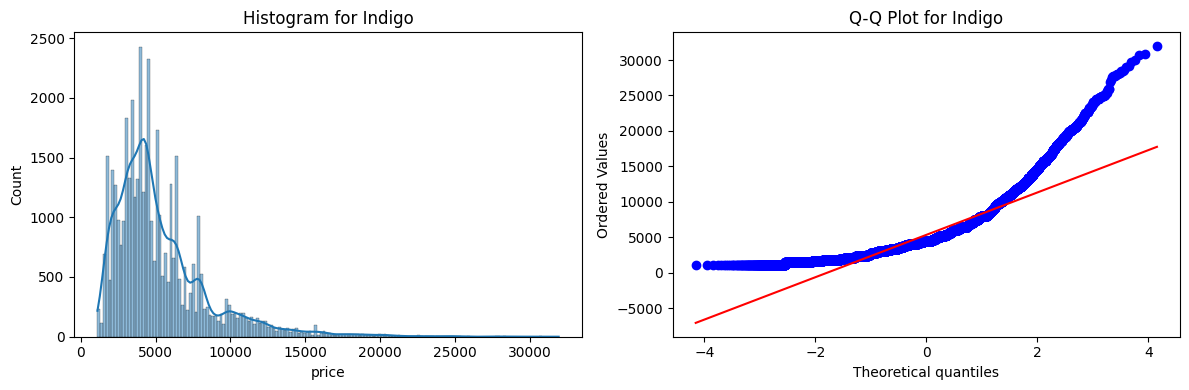

The data for Indigo does not follow a normal distribution (p-value = 0.0).


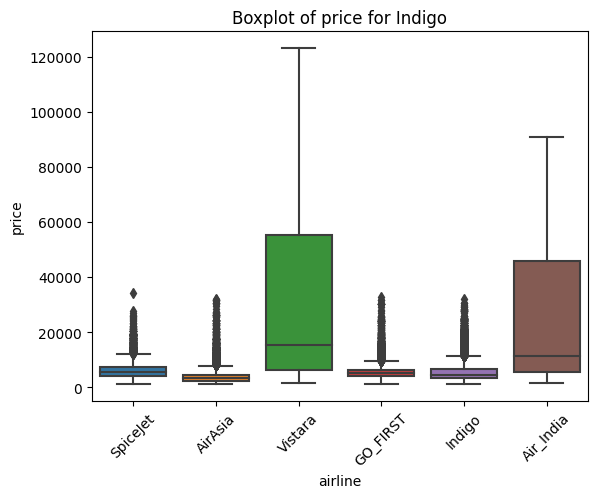

The variances for Indigo are not homogeneous (p-value = 0.0).




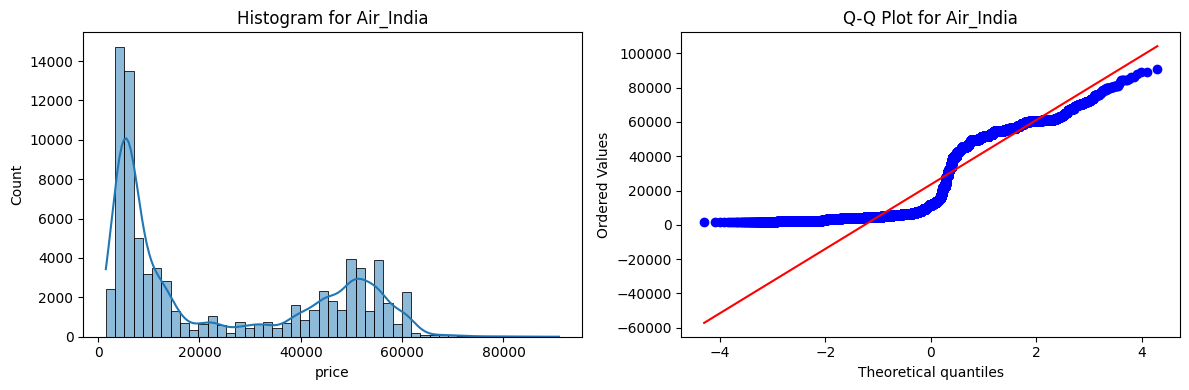

The data for Air_India does not follow a normal distribution (p-value = 0.0).


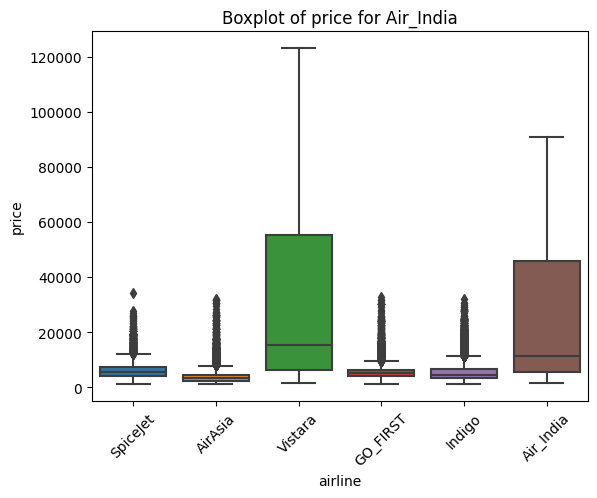

The variances for Air_India are not homogeneous (p-value = 0.0).




In [ ]:
check_distribution_and_homogeneity(df, 'airline', 'price')

In [ ]:
result = kruskal_wallis_test_and_interpret(df, 'airline', 'price')
for key, value in result.items():
  print(f"{key}: {value}")


Null Hypothesis: There is no significant difference in price among the groups.
Alternative Hypothesis: There is a significant difference in price among the groups.
Kruskal-Wallis H-statistic: 94612.80508823595
p-value: 0.0
Interpretation: Reject the null hypothesis. There is a significant difference in price among the groups.


## c) How is the price affected when tickets are bought in just 1 or 2 days before departure?


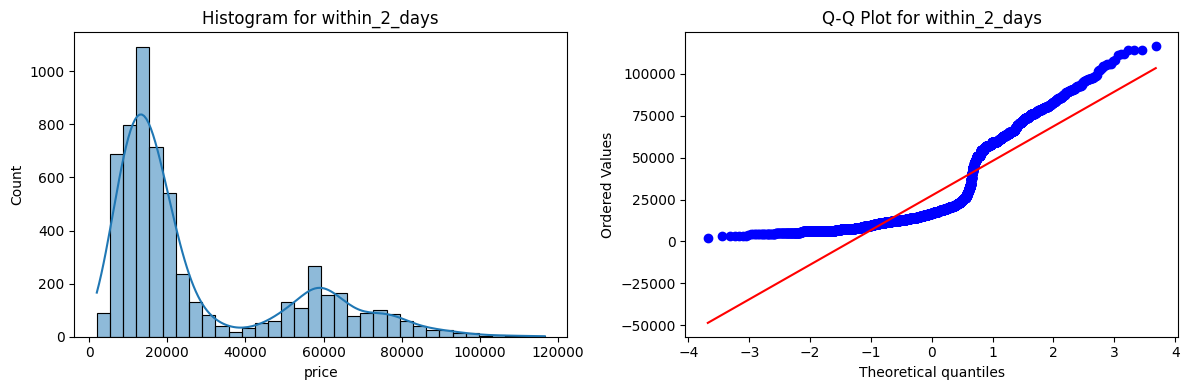

The data for within_2_days does not follow a normal distribution (p-value = 0.0).


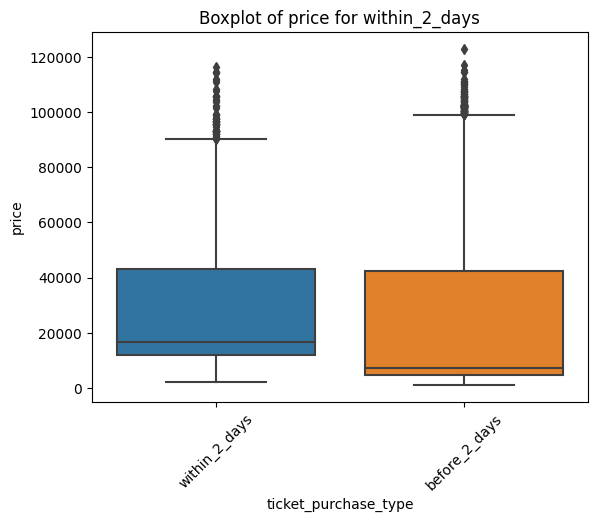

The variances for within_2_days are homogeneous (p-value = 0.8225749109154943).




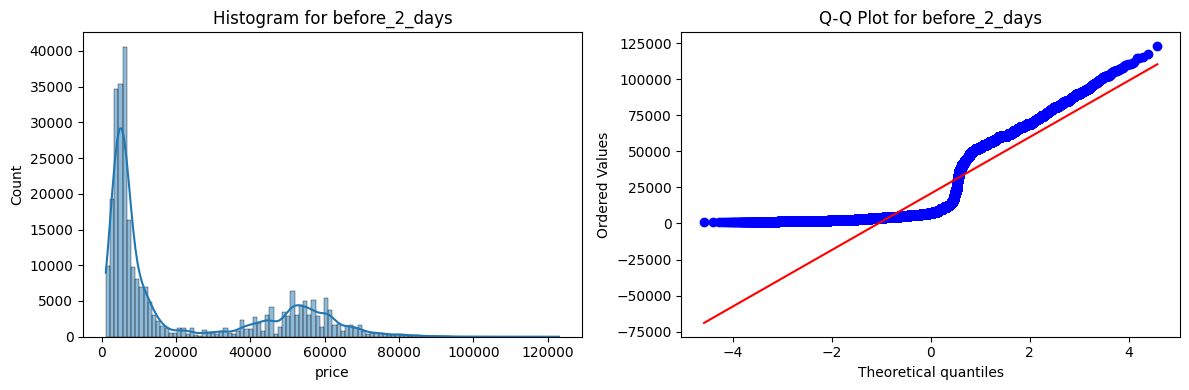

The data for before_2_days does not follow a normal distribution (p-value = 0.0).


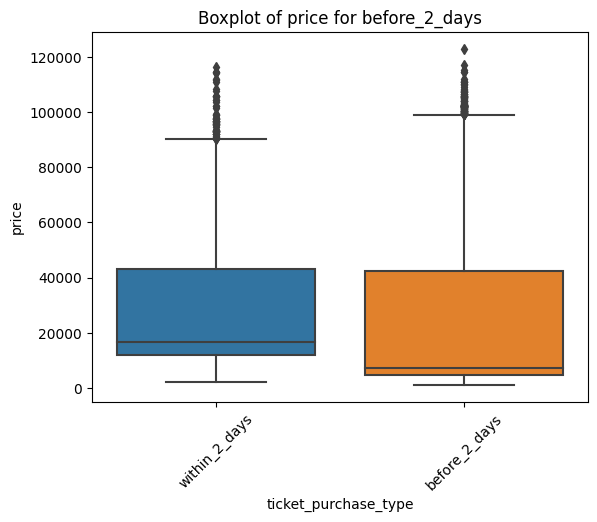

The variances for before_2_days are homogeneous (p-value = 0.8225749109154943).




In [ ]:
check_distribution_and_homogeneity(df, 'ticket_purchase_type', 'price')

## Mann Whitney U Test

In [ ]:
result = mann_whitney_u_test('ticket_purchase_type', 'price', df)
for key, value in result.items():
    print(key)
    for subkey, subvalue in value.items():
        print(f"{subkey}: {subvalue}")
    print()


within_2_days vs before_2_days
Null Hypothesis: There is no significant difference in price between within_2_days and before_2_days.
Alternative Hypothesis: There is a significant difference in price between within_2_days and before_2_days.
Mann-Whitney U Statistic: 1221501426.0
p-value: 0.0
Interpretation: Reject the null hypothesis. There is a significant difference in price between within_2_days and before_2_days.



In [ ]:
df.describe()

,duration,days_left,price,stops_numerical
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523,0.924312
std,7.191997,13.561004,22697.767366,0.398106
min,0.830000,1.000000,1105.000000,0.000000
25%,6.830000,15.000000,4783.000000,1.000000
50%,11.250000,26.000000,7425.000000,1.000000
75%,16.170000,38.000000,42521.000000,1.000000
max,49.830000,49.000000,123071.000000,2.000000


In [ ]:
def check_distribution_and_shapiro(df, column_name, alpha=0.05):
    """
    Check the data distribution and perform the Shapiro-Wilk normality test for a specified numerical column.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: Name of the column for which to check the distribution and perform the test.
    - alpha: Significance level for the Shapiro-Wilk test (default is 0.05).

    Returns:
    - result_dict: A dictionary containing the test results and interpretation.
    """

    # Subset the data for the specified column
    data = df[column_name]

    # Check Normality:
    # Plot a histogram and Q-Q plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram for {column_name}')

    plt.subplot(1, 2, 2)
    stats.probplot(data, plot=plt)
    plt.title(f'Q-Q Plot for {column_name}')

    plt.tight_layout()
    plt.show()

    # Perform the Shapiro-Wilk normality test
    _, p_value_normal = stats.shapiro(data)

    # Null Hypothesis
    null_hypothesis = f"The data for {column_name} follows a normal distribution."

    # Alternative Hypothesis
    alternative_hypothesis = f"The data for {column_name} does not follow a normal distribution."

    # Interpretation
    if p_value_normal < alpha:
        interpretation = f"Reject the null hypothesis. {alternative_hypothesis} (p-value = {p_value_normal})"
    else:
        interpretation = f"Fail to reject the null hypothesis. {null_hypothesis} (p-value = {p_value_normal})"

    result_dict = {
        "Null Hypothesis": null_hypothesis,
        "Alternative Hypothesis": alternative_hypothesis,
        "Shapiro-Wilk Test Statistic": None,
        "p-value": p_value_normal,
        "Interpretation": interpretation
    }

    return result_dict


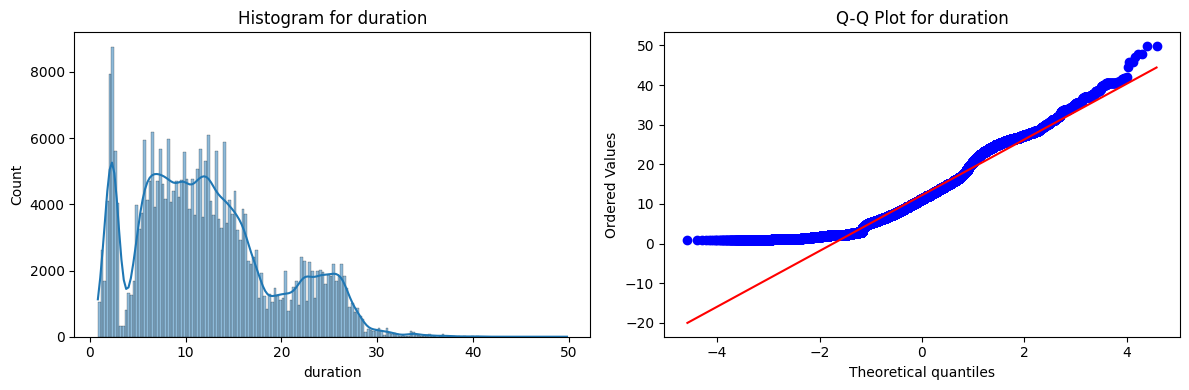

Null Hypothesis: The data for duration follows a normal distribution.
Alternative Hypothesis: The data for duration does not follow a normal distribution.
Shapiro-Wilk Test Statistic: None
p-value: 0.0
Interpretation: Reject the null hypothesis. The data for duration does not follow a normal distribution. (p-value = 0.0)


In [ ]:
result = check_distribution_and_shapiro(df, 'duration')
for key, value in result.items():
    print(f"{key}: {value}")


    # Apply the specified transformation
    if transformation == 'log':
        transformed_data = np.log(data)
    elif transformation == 'sqrt':
        transformed_data = np.sqrt(data)
    elif transformation == 'inverse':
        transformed_data = 1 / data
    elif transformation == 'boxcox':
        transformed_data, _ = stats.boxcox(data)


In [ ]:
df.drop("stops", axis=1, inplace =True)

In [ ]:
df

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price,ticket_purchase_type,stops_numerical
0,SpiceJet,SG-8709,Delhi,Evening,Night,Mumbai,Economy,2.17,1,5953,within_2_days,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,Morning,Mumbai,Economy,2.33,1,5953,within_2_days,0
2,AirAsia,I5-764,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,2.17,1,5956,within_2_days,0
3,Vistara,UK-995,Delhi,Morning,Afternoon,Mumbai,Economy,2.25,1,5955,within_2_days,0
4,Vistara,UK-963,Delhi,Morning,Morning,Mumbai,Economy,2.33,1,5955,within_2_days,0
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,Evening,Hyderabad,Business,10.08,49,69265,before_2_days,1
300149,Vistara,UK-826,Chennai,Afternoon,Night,Hyderabad,Business,10.42,49,77105,before_2_days,1
300150,Vistara,UK-832,Chennai,Early_Morning,Night,Hyderabad,Business,13.83,49,79099,before_2_days,1
300151,Vistara,UK-828,Chennai,Early_Morning,Evening,Hyderabad,Business,10.00,49,81585,before_2_days,1


## Feature Engineering

In [ ]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [ ]:
df['class'].replace({"Economy": 0, "Business": 1}, inplace = True)

In [ ]:
grouped_df = df.groupby("flight", as_index=False).agg(
    flight_avg_price=("price", "mean"),
    flight_std_price=("price", "std")
)
grouped_df

,flight,flight_avg_price,flight_std_price
0,6E-102,2067.435897,500.549897
1,6E-105,4079.000000,0.000000
2,6E-113,5073.938776,2655.258285
3,6E-121,1702.000000,94.183472
4,6E-123,6249.400000,1105.171163
...,...,...,...
1556,UK-988,37685.530775,29787.450947
1557,UK-993,30494.012075,24981.199901
1558,UK-994,36401.095837,28790.620617
1559,UK-995,31270.540039,25514.686858


In [ ]:
df = pd.merge(df, grouped_df, on="flight", how="inner")
print(df.shape)

(300153, 14)


In [ ]:
df.drop("flight",axis=1, inplace=True)
print(df.shape)

(300153, 13)


In [ ]:
# df["ticket_purchase_type"]
df

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price,ticket_purchase_type,stops_numerical,flight_avg_price,flight_std_price
0,SpiceJet,Delhi,Evening,Night,Mumbai,0,2.17,1,5953,within_2_days,0,4740.022556,1797.339391
1,SpiceJet,Delhi,Evening,Night,Mumbai,0,2.17,3,6060,before_2_days,0,4740.022556,1797.339391
2,SpiceJet,Delhi,Evening,Night,Mumbai,0,2.17,4,5953,before_2_days,0,4740.022556,1797.339391
3,SpiceJet,Delhi,Evening,Night,Mumbai,0,2.17,5,5953,before_2_days,0,4740.022556,1797.339391
4,SpiceJet,Delhi,Evening,Night,Mumbai,0,2.17,6,5953,before_2_days,0,4740.022556,1797.339391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Indigo,Chennai,Afternoon,Night,Hyderabad,0,5.92,48,1105,before_2_days,1,1105.000000,0.000000
300149,Indigo,Chennai,Afternoon,Night,Hyderabad,0,8.33,48,1105,before_2_days,1,1105.000000,0.000000
300150,Air_India,Delhi,Afternoon,Afternoon,Mumbai,1,27.50,45,44025,before_2_days,1,44025.000000,0.000000
300151,Air_India,Delhi,Afternoon,Afternoon,Mumbai,1,27.50,47,44025,before_2_days,1,44025.000000,0.000000


In [ ]:
columns_to_encode=["airline", "source_city", "departure_time", "arrival_time", "destination_city"]
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

In [ ]:
print(encoded_df.shape)
encoded_df.head()


(300153, 38)


,class,duration,days_left,price,ticket_purchase_type,stops_numerical,flight_avg_price,flight_std_price,airline_AirAsia,airline_Air_India,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,2.17,1,5953,within_2_days,0,4740.022556,1797.339391,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,2.17,3,6060,before_2_days,0,4740.022556,1797.339391,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,2.17,4,5953,before_2_days,0,4740.022556,1797.339391,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,2.17,5,5953,before_2_days,0,4740.022556,1797.339391,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,2.17,6,5953,before_2_days,0,4740.022556,1797.339391,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

## Drop the following columns to be safe from dummy variable trap after doing one hot encoding of these features
- Drop 'SpiceJet' column from airline
- Drop 'Chennai' column from source_city
- Drop 'Chennai' column from destination_city
- Drop 'Late_Night' column from departure_time
- Drop 'Late_Night' column from arrival_time

In [ ]:
dummy_cols = ["airline_SpiceJet", "source_city_Chennai",
              "destination_city_Chennai", "departure_time_Late_Night",
              "arrival_time_Late_Night"]
encoded_df.drop(dummy_cols, axis=1, inplace=True)

In [ ]:
encoded_df.drop("ticket_purchase_type", axis=1, inplace=True)

In [ ]:
encoded_df.columns

Index(['class', 'duration', 'days_left', 'price', 'stops_numerical',
       'flight_avg_price', 'flight_std_price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_Vistara', 'source_city_Bangalore', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Afternoon', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [ ]:
encoded_df.isnull().sum()

class                            0
duration                         0
days_left                        0
price                            0
stops_numerical                  0
flight_avg_price                 0
flight_std_price                21
airline_AirAsia                  0
airline_Air_India                0
airline_GO_FIRST                 0
airline_Indigo                   0
airline_Vistara                  0
source_city_Bangalore            0
source_city_Delhi                0
source_city_Hyderabad            0
source_city_Kolkata              0
source_city_Mumbai               0
departure_time_Afternoon         0
departure_time_Early_Morning     0
departure_time_Evening           0
departure_time_Morning           0
departure_time_Night             0
arrival_time_Afternoon           0
arrival_time_Early_Morning       0
arrival_time_Evening             0
arrival_time_Morning             0
arrival_time_Night               0
destination_city_Bangalore       0
destination_city_Del

In [ ]:
encoded_df.loc[encoded_df['flight_std_price'].isna(), 'flight_std_price'] = 0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
train_data = encoded_df.drop("price", axis=1)
labels = encoded_df["price"]
print(train_data.shape)
print(labels.shape)


x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300153, 31)
(300153,)
(240122, 31)
(60031, 31)
(240122,)
(60031,)


In [ ]:
x_train.columns

Index(['class', 'duration', 'days_left', 'stops_numerical', 'flight_avg_price',
       'flight_std_price', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_Vistara',
       'source_city_Bangalore', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [ ]:
# Initialize the StandardScaler
columns_to_scale = ["duration", "days_left", "flight_avg_price", "flight_std_price"]
scaler = MinMaxScaler()

x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])


In [ ]:
x_train

,class,duration,days_left,stops_numerical,flight_avg_price,flight_std_price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
148417,1,0.095306,0.666667,1,0.486764,0.596708,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
36879,0,0.120816,0.166667,1,0.736764,0.854011,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
274531,0,0.566327,0.875000,1,0.708171,0.846189,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
166397,0,0.515306,0.625000,1,0.130667,0.109948,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
272722,1,0.229592,0.354167,1,0.747649,0.888538,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0.093673,0.416667,1,0.040272,0.041650,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
259178,0,0.285714,0.437500,1,0.052640,0.061943,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
131932,0,0.042653,0.104167,0,0.105181,0.054282,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
146867,1,0.192245,0.312500,1,0.606070,0.714814,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# Linear Regression
<li>Linear regression is a statistical practice of calculating a straight line that specifies a mathematical relationship between two variables.</li>
<li>Linear regression analysis is used to predict the value of a variable based on the value of another variable.</li>
<li>The variable you want to predict is called the dependent variable.</li>
<li>The variable you are using to predict the other variable's value is called the independent variable.</li>

<ol>
    <li>Simple Linear Regression</li>
    <li>Multiple Linear Regression</li>
</ol>

## 1. Simple Linear Regression
<li>Simple linear regression is a regression model that estimates the relationship between one independent and one dependent variable using a straight line.</li>
<li>Both variables should be quantitative.</li>

<li>The following equation is the general form of the simple linear regression model.</li>
<code>
    ^
    y =B0 + B1x1
</code>
Where    
^
y represents the predicted value,
x1 represents the feature column we choose to use in our model.
<li>These values are independent of the dataset.</li>
<li>On the other hand, B0 and B1 represent the parameter values that are specific to the dataset.</li>
<li>The goal of simple linear regression is to find the optimal B0 and B1 values that best describe the relationship between the feature and the target column.</li>


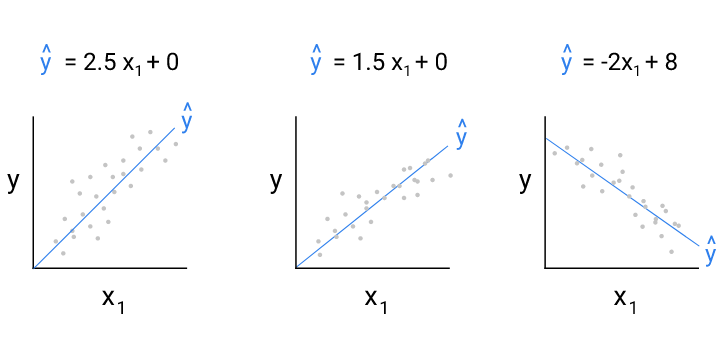

<li>The first step is to select the feature x1, we want to use in our model.</li>
<li>Once we select this feature, we can use scikit-learn to determine the optimal parameter values B0 and B1 based on the training data.</li>


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ 4.44347273e+04,  3.61387328e+03, -6.07401458e+03,  5.94593024e+03,
        2.17545632e+04, -7.32754795e+03, -1.53595469e+03, -6.73298672e+03,
       -2.72325483e+02,  4.95425494e+02, -4.92485002e+03, -1.53554776e+02,
       -8.12671197e+02, -1.00205172e+03,  1.08694418e+03,  1.54380850e+01,
       -1.15292195e+03, -4.85085913e+02, -7.74940478e+02, -3.10883808e+02,
       -9.15212438e+02, -9.84951082e+02, -1.45726952e+03, -3.16384726e+02,
       -5.82270104e+02,  1.35213191e+02,  4.68882192e+02, -2.22990633e+02,
       -1.33107772e+03,  1.66472973e+03,  6.12627309e+02])

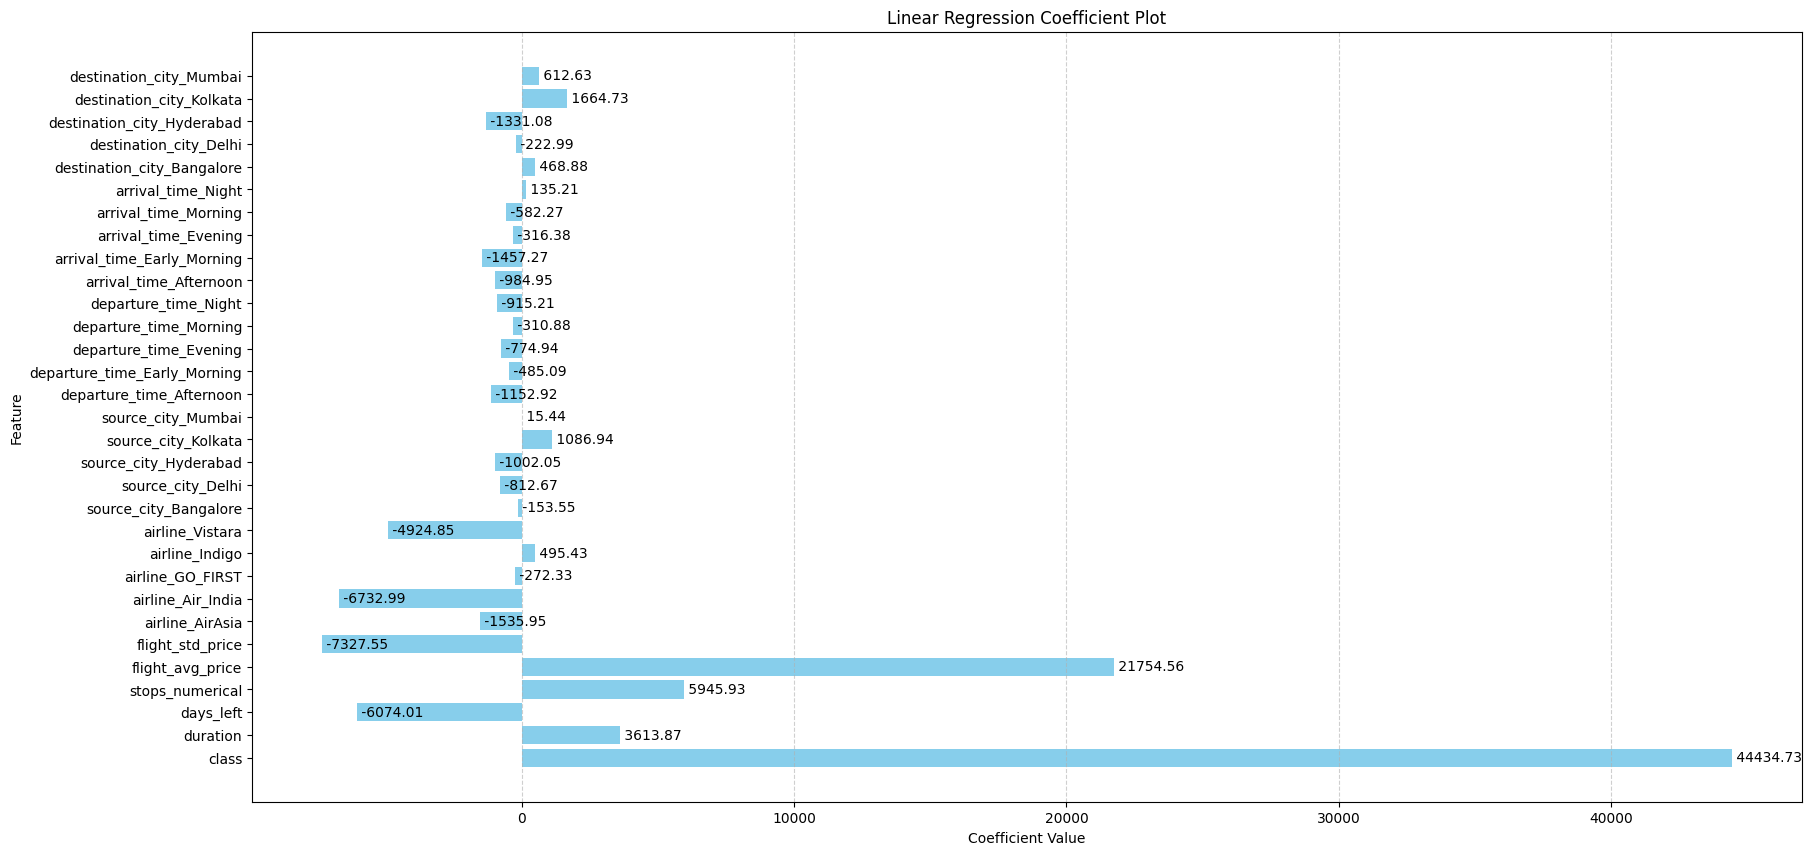

In [ ]:
coefficients = lr.coef_
# Create a bar plot to visualize the coefficients
plt.figure(figsize=(20, 10))
plt.barh(x_train.columns, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficient Plot')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add coefficient values to the plot
for i, coef in enumerate(coefficients):
    plt.text(coef, i, f' {coef:.2f}', va='center')

plt.show()


In [ ]:
predictions = lr.predict(x_test)

### Performance Metrics In Linear Regression
<li>To evaluate the performance or quality of the model, different metrics are used, and these metrics are known as performance metrics or evaluation metrics.</li>
<li>Some of the performance metrics used in linear regression are:</li>
<ol>
    <b><li>Mean Absolute Error</li></b>
    <b><li>Mean Squared Error</li></b>
    <b><li>Root Mean Squared Error</li></b>
    <b><li>R²</li></b>
    <b><li>Adjuster R²</li></b>
</ol>

### Mean Squared Error
<li>In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors.</li>
<li>The mean squared error (MSE) tells you how close a regression line is to a set of points.</li>
<li>It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.</li>
<li>The squaring is necessary to remove any negative signs. It also gives more weight to larger differences.</li>
<li>It’s called the mean squared error as you’re finding the average of a set of errors.</li>
<li>The lower the MSE, the better the forecast.</li>
<li>In machine learning, mean squared error is the average difference between the squares of actual values and the predicted values.</li>
<li>The formula to calculate mean squared error is given by:</li>

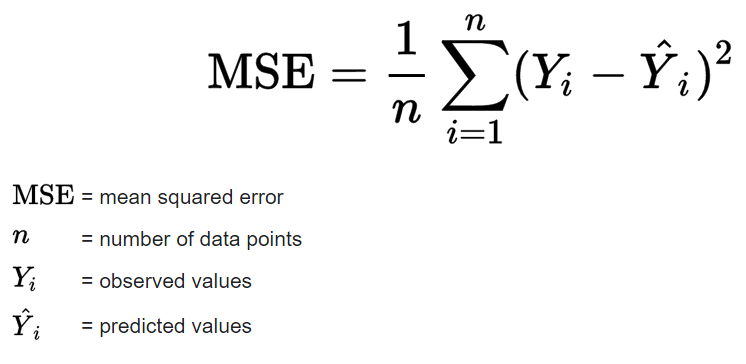


### Root Mean Squared Error
<li>RMSE is a quadratic scoring rule that also measures the average magnitude of the error.</li>
<li>It’s the square root of the average of squared differences between prediction and actual observation.</li>
<li>The formula to calculate RMSE is given by:</li>

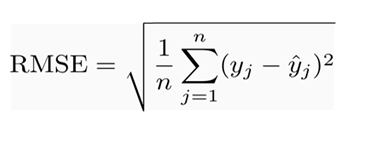


### R²
<li>R-Squared determines the proportion of variance in the dependent variable that can be explained by the independent variable.</li>
<li>In other words, r-squared shows how well the data fit the regression model (the goodness of fit).</li>
<li>R-squared measures the strength of the relationship between your model and the dependent variable on a scale of 0 – 1.</li>
</li>Usually, the larger the R2, the better the regression model fits your observations.</li>
<li>The formula to calculate R2 is given by:</li>

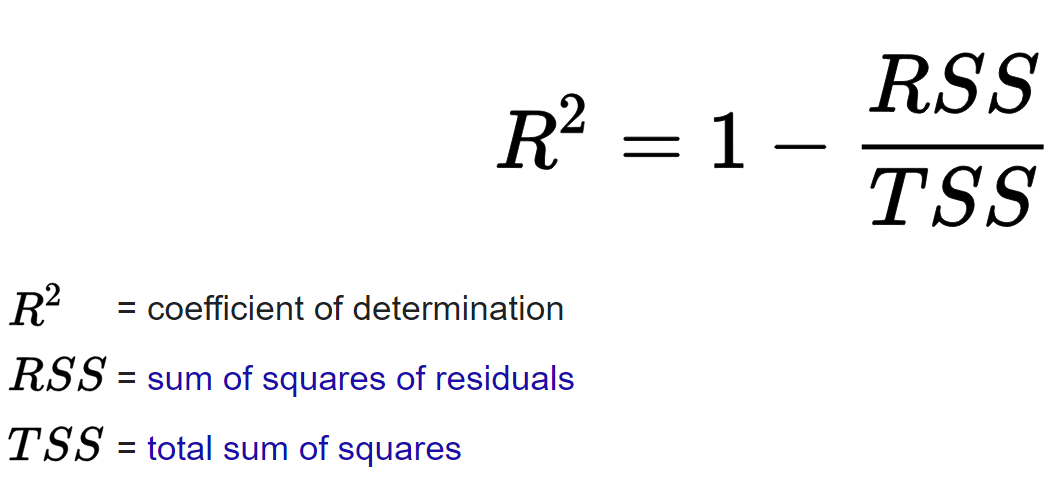
<li>But sometimes, small R-squared values are not always a problem, and high R-squared values are not necessarily good.</li>


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print("RMSE is ", np.sqrt(mean_squared_error(y_test, predictions)))
print("MSE is ", mean_squared_error(y_test, predictions))
print("MAE is ", mean_absolute_error(y_test, predictions))
print("R2 score is ", r2_score(y_test, predictions))

RMSE is  6600.003093145057
MSE is  43560040.82952432
MAE is  4471.217617691751
R2 score is  0.9151122664203478


In [ ]:
print("RMSE is ", np.sqrt(mean_squared_error(y_test, predictions)))
print("MSE is ", mean_squared_error(y_test, predictions))
print("MAE is ", mean_absolute_error(y_test, predictions))
print("R2 score is ", r2_score(y_test, predictions))

RMSE is  6600.003093145057
MSE is  43560040.82952432
MAE is  4471.217617691751
R2 score is  0.9151122664203478


In [ ]:
pred_df = pd.DataFrame({"actual": y_test, "prediction": predictions})
pred_df

,actual,prediction
27131,12990,16513.585924
266857,4637,9371.238048
141228,11205,14809.068985
288329,14642,12571.210771
97334,49725,51500.542120
...,...,...
5234,4020,7502.227667
5591,6395,4877.080155
168314,43697,51869.829805
175191,6682,10047.066066


### Regularization In Regression

<li>During the Machine Learning model building, the Regularization Techniques is an unavoidable and important step to improve the model.</li>
<li>This is also called the Shrinkage method in which we use to add the penalty term to control the complex model to avoid overfitting by reducing the variance.</li>
<li>In regression, we can came across overfitted model where the best fit line works best for the training dataset but fails for testing datasets.</li>
<li>To prevent from such overfitting problem, we have two different methods in regression. They are :</li>
<ol>
    <b><li>Lasso Regression</li></b>
    <b><li>Ridge Regression</li></b>



### 1. Lasso Regression

<li>Lasso Regression is also called as L1 regularization technique.</li>
<li>We can use lasso regression for feature selection as well because the beta coefficients can be shrinked down to 0 incase of lasso regression.</li>
<li>In lasso regression, we add the absolute values of the regression coefficients as a penalty term to reduce overfitting.</li>
<li>The formula to calculate lasso regression is given by:</li>


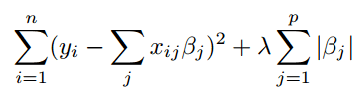

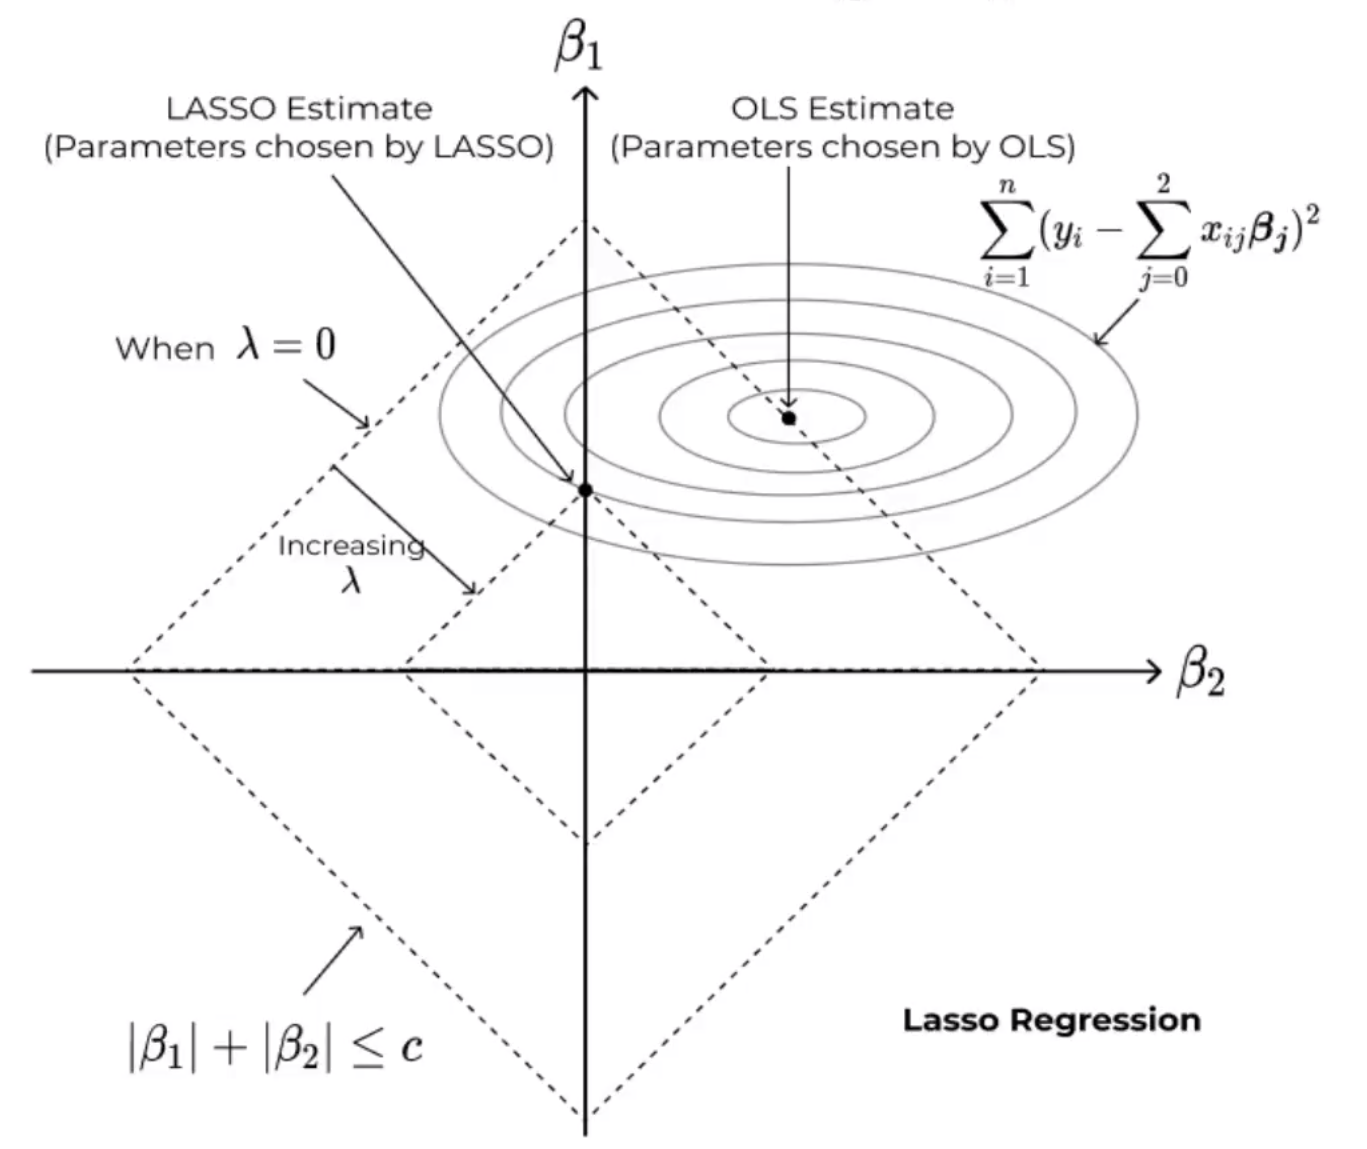

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_r = Lasso()

In [ ]:
lasso_r.fit(x_train, y_train)

Lasso()

In [ ]:
lasso_r.coef_

array([ 4.44270968e+04,  3.55465031e+03, -6.06540628e+03,  5.94588339e+03,
        2.07225564e+04, -6.45248598e+03, -1.46390713e+03, -6.68000954e+03,
       -1.59436985e+02,  5.60652647e+02, -4.86078644e+03, -1.09154911e+02,
       -7.92883087e+02, -9.72248381e+02,  1.10988444e+03,  1.34361135e+01,
       -6.66716429e+02, -0.00000000e+00, -2.70096687e+02,  1.63069914e+02,
       -4.11094562e+02, -8.97313109e+02, -1.35239951e+03, -2.26336390e+02,
       -4.96642680e+02,  2.09814560e+02,  4.59709972e+02, -2.19445210e+02,
       -1.33146502e+03,  1.65666047e+03,  5.96868318e+02])

In [ ]:
predictions = lasso_r.predict(x_test)

In [ ]:
print("Mean squared error is {}".format(mean_squared_error(y_test, predictions)))
print("Mean Absolute error is {}".format(mean_absolute_error(y_test, predictions)))
print("Root Mean squared error is {}".format(mean_squared_error(y_test, predictions,
                                                               squared=False)))
print("R2 score is {}".format(r2_score(y_test, predictions)))

Mean squared error is 43558322.92532008
Mean Absolute error is 4467.68311801086
Root Mean squared error is 6599.872947664984
R2 score is 0.9151156141902679


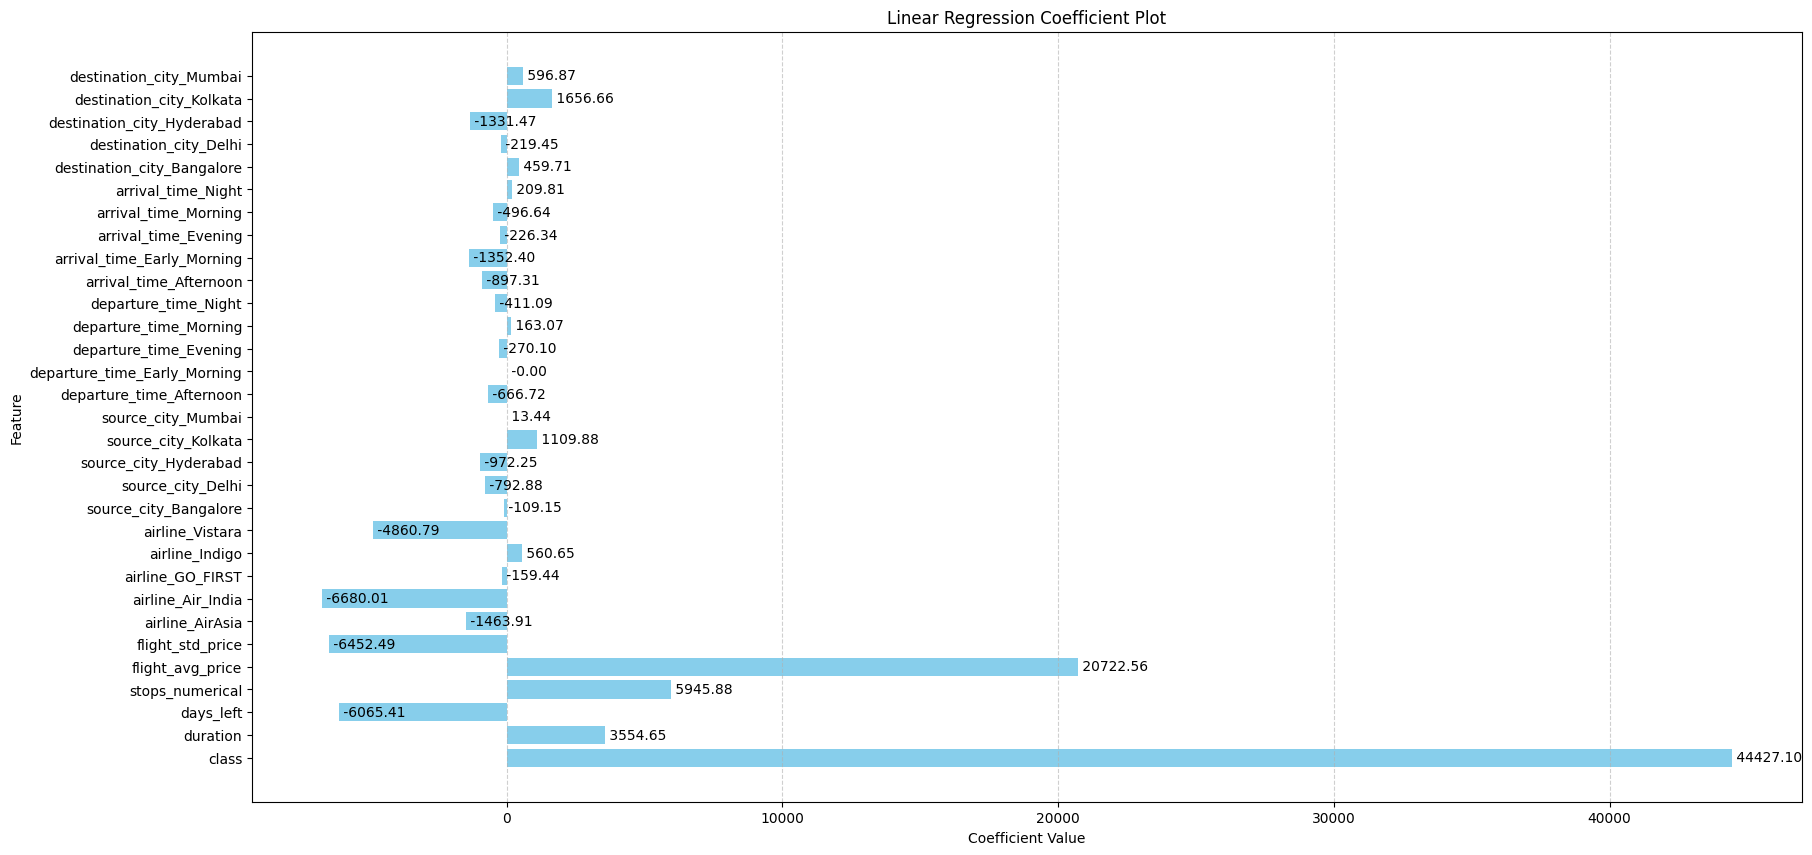

In [ ]:
coefficients = lasso_r.coef_
# Create a bar plot to visualize the coefficients
plt.figure(figsize=(20, 10))
plt.barh(x_train.columns, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficient Plot')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add coefficient values to the plot
for i, coef in enumerate(coefficients):
    plt.text(coef, i, f' {coef:.2f}', va='center')

plt.show()


### 2. Ridge Regession

<li>Ridge Regression is also called as L2 regularization technique.</li>
<li>We can not use ridge regression for feature selection as well because the beta coefficients can only be shrinked down to lower values but not 0.</li>
<li>In ridge regression, we add the squared values of the regression coefficients as a penalty term to reduce overfitting.</li>
<li>The formula to calculate ridge regression is given by:</li>

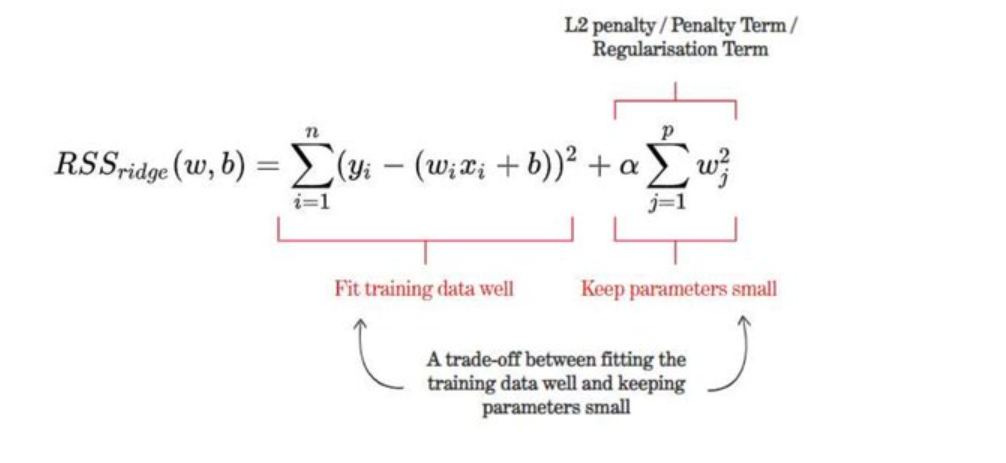

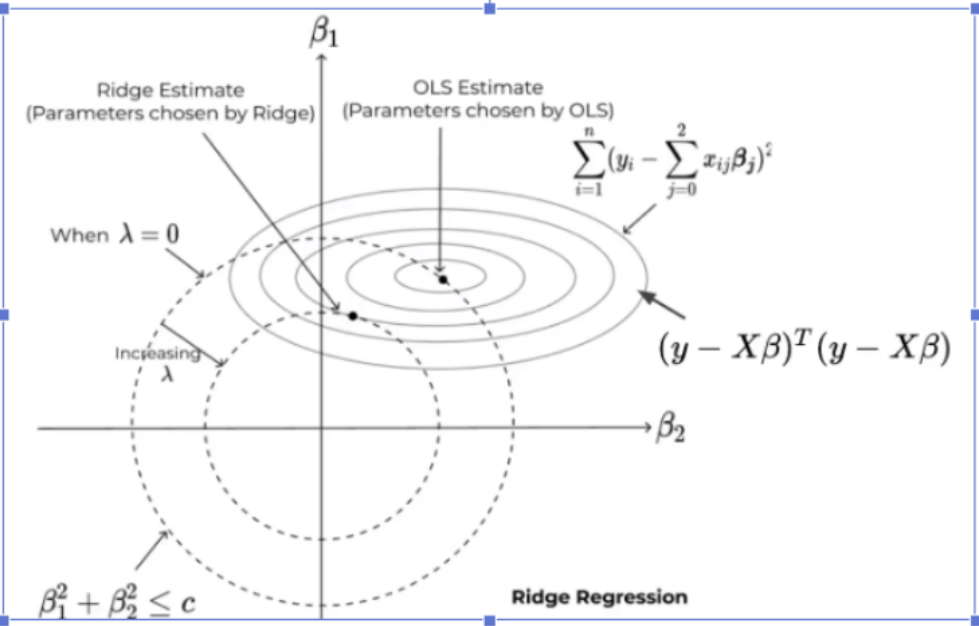